## Importing Libraries and Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import sklearn.metrics as metrics

## Read in dataset 

fraud = pd.read_csv('Base.csv')
fraud

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,...,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
0,0,0.3,0.986506,-1,25,40,0.006735,102.453711,AA,1059,...,0,1500.0,0,INTERNET,16.224843,linux,1,1,0,0
1,0,0.8,0.617426,-1,89,20,0.010095,-0.849551,AD,1658,...,0,1500.0,0,INTERNET,3.363854,other,1,1,0,0
2,0,0.8,0.996707,9,14,40,0.012316,-1.490386,AB,1095,...,0,200.0,0,INTERNET,22.730559,windows,0,1,0,0
3,0,0.6,0.475100,11,14,30,0.006991,-1.863101,AB,3483,...,0,200.0,0,INTERNET,15.215816,linux,1,1,0,0
4,0,0.9,0.842307,-1,29,40,5.742626,47.152498,AA,2339,...,0,200.0,0,INTERNET,3.743048,other,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,0,0.8,0.124690,-1,143,30,0.051348,-0.826239,AB,530,...,0,1500.0,0,INTERNET,16.967770,other,0,1,0,7
999996,0,0.9,0.824544,-1,193,30,0.009591,0.008307,AC,408,...,1,1000.0,0,INTERNET,1.504109,macintosh,0,1,0,7
999997,0,0.8,0.140891,-1,202,10,0.059287,50.609995,AA,749,...,0,200.0,0,INTERNET,16.068595,other,0,1,0,7
999998,0,0.9,0.002480,52,3,30,0.023357,-1.313387,AB,707,...,0,200.0,0,INTERNET,1.378683,linux,1,1,0,7


## Exploratory Data Analysis

In [2]:
## Checking datatypes of dataset columns

fraud.dtypes

fraud_bool                            int64
income                              float64
name_email_similarity               float64
prev_address_months_count             int64
current_address_months_count          int64
customer_age                          int64
days_since_request                  float64
intended_balcon_amount              float64
payment_type                         object
zip_count_4w                          int64
velocity_6h                         float64
velocity_24h                        float64
velocity_4w                         float64
bank_branch_count_8w                  int64
date_of_birth_distinct_emails_4w      int64
employment_status                    object
credit_risk_score                     int64
email_is_free                         int64
housing_status                       object
phone_home_valid                      int64
phone_mobile_valid                    int64
bank_months_count                     int64
has_other_cards                 

In [3]:
## Checking if there are any duplicated rows

fraud[fraud.duplicated()] ## No duplicated rows

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,...,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month


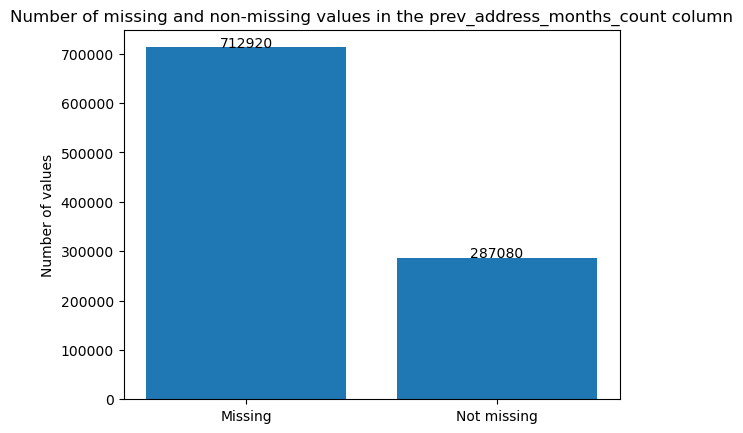

In [4]:
fraud.loc[fraud["prev_address_months_count"] == -1, 'prev_address_months_count'] = "Missing"
fraud.loc[fraud["prev_address_months_count"] != "Missing", 'prev_address_months_count'] = "Not missing"

plt.bar(fraud["prev_address_months_count"].value_counts().index, fraud["prev_address_months_count"].value_counts())
plt.ylabel("Number of values")
plt.title("Number of missing and non-missing values in the prev_address_months_count column")

for a, b in zip(fraud["prev_address_months_count"].value_counts().index, fraud["prev_address_months_count"].value_counts()):
    plt.text(a, b, str(b), ha = "center")

In [5]:
print(len(fraud.loc[fraud["current_address_months_count"] == -1, 'current_address_months_count']))
fraud.loc[fraud["current_address_months_count"] == -1, 'current_address_months_count'] = np.nan

4254


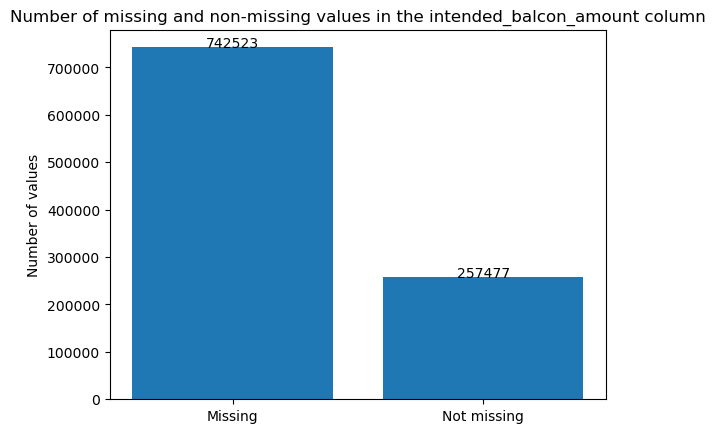

In [6]:
fraud.loc[fraud["intended_balcon_amount"] < 0, 'intended_balcon_amount'] = "Missing"
fraud.loc[fraud["intended_balcon_amount"] != "Missing", 'intended_balcon_amount'] = "Not missing"

plt.bar(fraud["intended_balcon_amount"].value_counts().index, fraud["intended_balcon_amount"].value_counts())
plt.ylabel("Number of values")
plt.title("Number of missing and non-missing values in the intended_balcon_amount column")

for a, b in zip(fraud["intended_balcon_amount"].value_counts().index, fraud["intended_balcon_amount"].value_counts()):
    plt.text(a, b, str(b), ha = "center")

In [7]:
print(len(fraud.loc[fraud["velocity_6h"] < 0, 'velocity_6h']))
fraud.loc[fraud["velocity_6h"] < 0, 'velocity_6h'] = np.nan

44


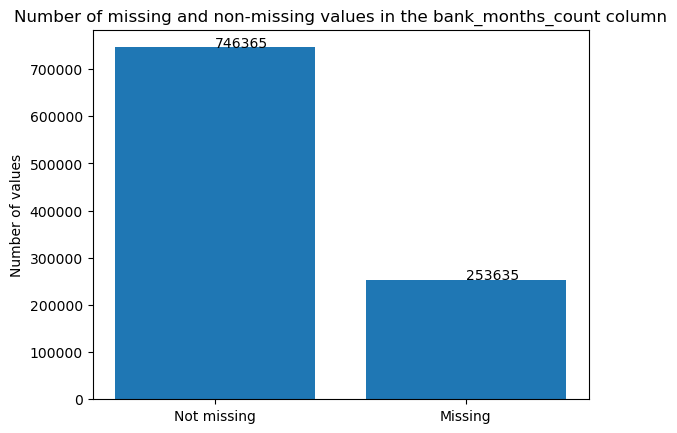

In [8]:
fraud.loc[fraud["bank_months_count"] == -1, 'bank_months_count'] = "Missing"
fraud.loc[fraud["bank_months_count"] != "Missing", 'bank_months_count'] = "Not missing"

plt.bar(fraud["bank_months_count"].value_counts().index, fraud["bank_months_count"].value_counts())
plt.ylabel("Number of values")
plt.title("Number of missing and non-missing values in the bank_months_count column")

for a, b in zip(fraud["bank_months_count"].value_counts().index, fraud["bank_months_count"].value_counts()):
    plt.text(a, b, str(b))

In [9]:
print(len(fraud.loc[fraud["session_length_in_minutes"] == -1, 'session_length_in_minutes']))
fraud.loc[fraud["session_length_in_minutes"] == -1, 'session_length_in_minutes'] = np.nan

2015


In [10]:
print(len(fraud.loc[fraud["device_distinct_emails_8w"] == -1, 'device_distinct_emails_8w']))
fraud.loc[fraud["device_distinct_emails_8w"] == -1, 'device_distinct_emails_8w'] = np.nan

359


In [11]:
fraud.isnull().sum()

fraud_bool                             0
income                                 0
name_email_similarity                  0
prev_address_months_count              0
current_address_months_count        4254
customer_age                           0
days_since_request                     0
intended_balcon_amount                 0
payment_type                           0
zip_count_4w                           0
velocity_6h                           44
velocity_24h                           0
velocity_4w                            0
bank_branch_count_8w                   0
date_of_birth_distinct_emails_4w       0
employment_status                      0
credit_risk_score                      0
email_is_free                          0
housing_status                         0
phone_home_valid                       0
phone_mobile_valid                     0
bank_months_count                      0
has_other_cards                        0
proposed_credit_limit                  0
foreign_request 

In [12]:
fraud.describe()

,fraud_bool,income,name_email_similarity,current_address_months_count,customer_age,days_since_request,zip_count_4w,velocity_6h,velocity_24h,velocity_4w,...,phone_home_valid,phone_mobile_valid,has_other_cards,proposed_credit_limit,foreign_request,session_length_in_minutes,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
count,1000000.000000,1000000.000000,1000000.000000,995746.000000,1000000.000000,1.000000e+06,1000000.000000,999956.000000,1000000.000000,1000000.000000,...,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,997985.000000,1000000.000000,999641.000000,1000000.0,1000000.000000
mean,0.011029,0.562696,0.493694,86.962058,33.689080,1.025705e+00,1572.692049,5665.548836,4769.781965,4856.324016,...,0.417077,0.889676,0.222988,515.851010,0.025242,7.562193,0.576947,1.019037,0.0,3.288674
std,0.104438,0.290343,0.289125,88.409289,12.025799,5.381835e+00,1005.374565,3009.206620,1479.212612,919.843934,...,0.493076,0.313293,0.416251,487.559902,0.156859,8.032021,0.494044,0.176700,0.0,2.209994
min,0.000000,0.100000,0.000001,0.000000,10.000000,4.036860e-09,1.000000,0.651202,1300.307314,2825.748405,...,0.000000,0.000000,0.000000,190.000000,0.000000,0.000872,0.000000,0.000000,0.0,0.000000
25%,0.000000,0.300000,0.225216,20.000000,20.000000,7.193246e-03,894.000000,3436.658913,3593.179135,4268.368423,...,0.000000,1.000000,0.000000,200.000000,0.000000,3.117642,0.000000,1.000000,0.0,1.000000
50%,0.000000,0.600000,0.492153,53.000000,30.000000,1.517574e-02,1263.000000,5319.876977,4749.921161,4913.436941,...,0.000000,1.000000,0.000000,200.000000,0.000000,5.122832,1.000000,1.000000,0.0,3.000000
75%,0.000000,0.800000,0.755567,130.000000,40.000000,2.633069e-02,1944.000000,7680.803021,5752.574191,5488.083356,...,1.000000,1.000000,0.000000,500.000000,0.000000,8.878215,1.000000,1.000000,0.0,5.000000
max,1.000000,0.900000,0.999999,428.000000,90.000000,7.845690e+01,6700.000000,16715.565404,9506.896596,6994.764201,...,1.000000,1.000000,1.000000,2100.000000,1.000000,85.899143,1.000000,2.000000,0.0,7.000000


In [13]:
## Display descriptive statistics for numeric columns not shown above

fraud[["bank_branch_count_8w", 
       "date_of_birth_distinct_emails_4w", 
       "credit_risk_score",
       "email_is_free"]].describe()

,bank_branch_count_8w,date_of_birth_distinct_emails_4w,credit_risk_score,email_is_free
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,184.361849,9.503544,130.989595,0.529886
std,459.625329,5.033792,69.681812,0.499106
min,0.000000,0.000000,-170.000000,0.000000
25%,1.000000,6.000000,83.000000,0.000000
50%,9.000000,9.000000,122.000000,1.000000
75%,25.000000,13.000000,178.000000,1.000000
max,2385.000000,39.000000,389.000000,1.000000


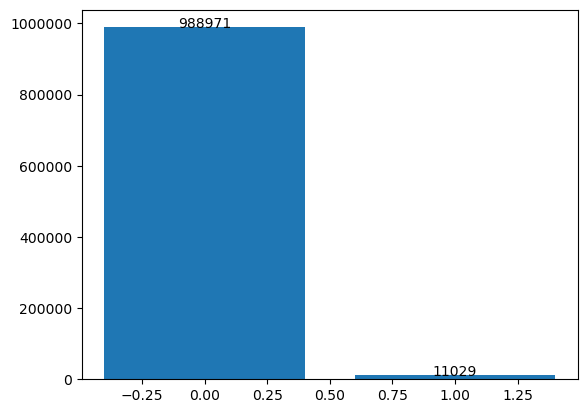

In [14]:
## Imbalanced dataset

plt.bar(fraud["fraud_bool"].value_counts().index, fraud["fraud_bool"].value_counts())
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
# plt.gca().set_xticklabels([])
# plt.xticks([])
for a, b in zip(fraud["fraud_bool"].value_counts().index, fraud["fraud_bool"].value_counts()):
    plt.text(a, b, str(b), ha = "center")


## Data Preprocessing

In [15]:
## Drop columns with significant number of missing values

fraud = fraud.drop(columns = ["prev_address_months_count", "intended_balcon_amount", "bank_months_count"])

## One-hot encoding for categorical variables

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer

transformer = make_column_transformer((OneHotEncoder(), ["payment_type", 
                                                        "employment_status", 
                                                        "housing_status", 
                                                        "source", 
                                                        "device_os"]), remainder = "passthrough")

transformed = transformer.fit_transform(fraud)
fraud = pd.DataFrame(transformed, columns = transformer.get_feature_names_out())
fraud = fraud.rename(columns = lambda x: x.replace('onehotencoder__', '') if x.startswith('onehotencoder__') else x.replace('remainder__', ''))

## Replace missing values in velocity_6h, current_address_months_count, session_length_in_minutes and device_distinct_emails_8w with their column medians

fraud[['velocity_6h', 'current_address_months_count', 'session_length_in_minutes', 'device_distinct_emails_8w']] = fraud[['velocity_6h', 'current_address_months_count', 'session_length_in_minutes', 'device_distinct_emails_8w']].fillna(fraud[['velocity_6h', 'current_address_months_count', 'session_length_in_minutes', 'device_distinct_emails_8w']].median())

fraud

,payment_type_AA,payment_type_AB,payment_type_AC,payment_type_AD,payment_type_AE,employment_status_CA,employment_status_CB,employment_status_CC,employment_status_CD,employment_status_CE,...,phone_home_valid,phone_mobile_valid,has_other_cards,proposed_credit_limit,foreign_request,session_length_in_minutes,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1500.0,0.0,16.224843,1.0,1.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,1500.0,0.0,3.363854,1.0,1.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,200.0,0.0,22.730559,0.0,1.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,200.0,0.0,15.215816,1.0,1.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,200.0,0.0,3.743048,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,1500.0,0.0,16.967770,0.0,1.0,0.0,7.0
999996,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1000.0,0.0,1.504109,0.0,1.0,0.0,7.0
999997,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,200.0,0.0,16.068595,0.0,1.0,0.0,7.0
999998,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,200.0,0.0,1.378683,1.0,1.0,0.0,7.0


In [16]:
## Handling imbalanced dataset with SMOTE

oversample = SMOTE()
X = fraud.drop(columns = ["fraud_bool"])
y = fraud["fraud_bool"]
X, y = oversample.fit_resample(X, y)

y.value_counts()

0.0    988971
1.0    988971
Name: fraud_bool, dtype: int64

## Data Split

In [17]:
## Split data into train and test datasets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

## Feature scaling

std_x = StandardScaler()
X_train = std_x.fit_transform(X_train)
X_test = std_x.transform(X_test)

## Model Training and Evaluation

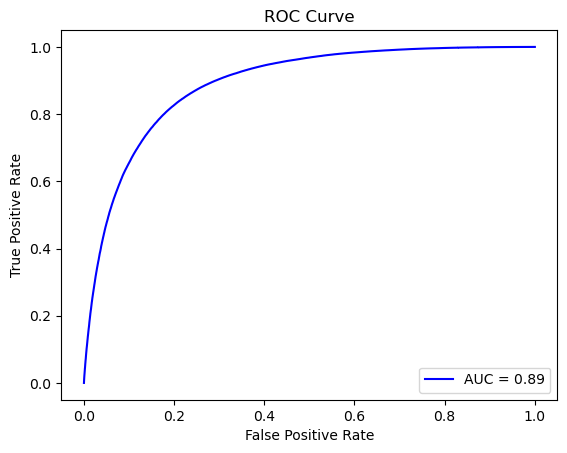

In [18]:
from sklearn.linear_model import LogisticRegression

log_classifier = LogisticRegression()
log_classifier.fit(X_train, y_train)

y_prob = log_classifier.predict_proba(X_test)[:, 1]
fpr, tpr, threshold = metrics.roc_curve(y_test, y_prob)
roc_auc = metrics.auc(fpr, tpr)

plt.title("ROC Curve")
plt.plot(fpr, tpr, 'b', label = "AUC = %0.2f" % roc_auc)
plt.legend(loc = "lower right")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()